## Abstract

This paper examines the nature of crime in New York City from 2011-2017 and how neighborohood income may be correlated to crime rates. Specifically, we consider two datsets, one that accounts for crimes reported, and another that reports that household incomes of each borough. We explore each dataset individually, then we consider the volume of crime per household and the percentage of households with income that is less than $50,000. We observe that....

## Introduction

Crime rates in NYC are a big topic of discourse in political campaigns. There seems to be a rise in crime throughout the city in general. This project will further explore the nature of this crime. Specifically, we will look at the crime rates in specific demographics. We will explore different crime rates in particular neighborhoods and their rates over the past few years. We will further explore more details about these neighborhoods, specifically, realting to income and wealth. We will look to better understand the relationship between the rise in crime rates and the economic well being of the relevant population. Specifically, we ask: What type (if any) of correlation can be observed between income and crime? By understanding the nature of the types of crime that are prevalent in NYC and its correlation to specific demographics and income, policy makers will have more perspective as to how to think about responding to rising crime rates and provide assistance in the areas that need it most. This will be a first step in the research to be further analyzed.

**Datasets to be used: ** 

- Income data: https://data.cccnewyork.org/data/table/29/household-income#29/51/62/a/a
- Crime data: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i



# Approach 



## Loading data into Postgresql.

In [1]:
import sqlalchemy
import psycopg2

In [2]:
# connect to sql
conn = psycopg2.connect(
    host="localhost",
    database="final4",
    user="postgres",
    password="999531")
print("successful connection")

successful connection


In [3]:
# create the crime table
cur = conn.cursor()
cur.execute('''create table "crime"
("CrimeId" integer not null unique primary key,
 "rpt_dt" varchar(100),
 "ofns_desc" varchar(100),
 "pd_desc" varchar(100),
 "crm_atpt_cptd_cd" varchar(100),
 "boro_nm" varchar(100),
 "prem_typ_desc" varchar(100),
 "vic_age_group" varchar(100),
 "vic_race" varchar(100),
 "vic_sex" varchar(100),
 "susp_age_group" varchar(100),
 "susp_race" varchar(100),
 "susp_sex" varchar(100)
)
''')

In [53]:
# make data to be list
data=crime_df.values.tolist()
# insert crime data into table
j=0
for i in data:   
    cur.execute("insert into \"crime\" (\"CrimeId\",rpt_dt,ofns_desc,pd_desc,crm_atpt_cptd_cd,boro_nm,prem_typ_desc,vic_age_group,vic_race,vic_sex,susp_age_group,susp_race,susp_sex) values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)",(j,i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11]))
    j=j+1  

In [54]:
# make the income data to list
pivot=percentpivot.values.tolist()
f_index=list(percentpivot.index)

In [ ]:
# create income table
cur=conn.cursor()
cur.execute('''create table "Income"
(address varchar(100),
years varchar(100),
"100,000 to 199,999" varchar(100),
"15,000 to 24,999" varchar(100),
"more than 200,000" varchar(100),
"25,000 to 34,999" varchar(100),
"35,000 to 49,999" varchar(100),
"50,000 to 74,999" varchar(100),
"75,000 to 99,999" varchar(100),
"under 15,000" varchar(100)
)
''')

In [ ]:
# insert income data into table
for i in range(len(pivot)):
    cur.execute("insert into \"Income\"(address,years,\"100,000 to 199,999\",\"15,000 to 24,999\",\"more than 200,000\",\"25,000 to 34,999\",\"35,000 to 49,999\",\"50,000 to 74,999\",\"75,000 to 99,999\",\"under 15,000\")\
               values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)",(f_index[i][0],f_index[i][1],pivot[i][0],pivot[i][1],pivot[i][2],pivot[i][3],pivot[i][4],pivot[i][5],pivot[i][6],pivot[i][7]))

In [ ]:
# Fetch the data from Postgres to Pandas
cur.execute("select * from \"crime\"")
crime=cur.fetchall()
cur.execute("select * from \"Income\"")
income=cur.fetchall()

## Data collection

In [6]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
pd.options.plotting.backend = "matplotlib"

%matplotlib inline

In [8]:
import pandas as pd
from sodapy import Socrata

crime_df = pd.DataFrame(columns = ['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd',
                                  'ofns_desc', 'pd_cd', 'pd_desc', 'crm_atpt_cptd_cd','law_cat_cd', 'boro_nm',
                                  'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code', 'x_coord_cd',
                                  'y_coord_cd', 'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'vic_age_group',
                                  'vic_race', 'vic_sex', 'susp_age_group', 'susp_race', 'susp_sex', 'cmplnt_to_dt',
                                  'cmplnt_to_tm', 'transit_district', 'station_name', 'parks_nm', 'housing_psa', 'hadevelopt'])

client = Socrata("data.cityofnewyork.us", None, timeout=100000)

def get_data(year):
  res = client.get("qgea-i56i", where=f"date_extract_y(rpt_dt) =={year}",  limit=1000000)
  res_df = pd.DataFrame.from_records(res)
  del res
  return res_df

# 2011 to 2018
for i in range(2011, 2018):
  crime_df = pd.concat([crime_df, get_data(i)])
  print(i)
# final_df = pd.concat([res_16_df, res_17_df, res_18_df, res_19_df, res_20_df, res_21_df])
crime_df.shape

2011
2012
2013
2014
2015
2016
2017


(3418008, 35)

#### Removing the irrelevant features

In [9]:
crime_df.drop(['transit_district', 'station_name', "hadevelopt", "cmplnt_num",'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', "addr_pct_cd", "cmplnt_fr_dt", "ky_cd", "lat_lon", "pd_cd", 'cmplnt_to_dt',
       'cmplnt_to_tm', "housing_psa", "law_cat_cd", "jurisdiction_code", "patrol_boro", "parks_nm", "cmplnt_fr_tm", "loc_of_occur_desc", "juris_desc"], axis=1, inplace=True)

In [10]:
crime_df.shape

(3418008, 12)

In [11]:
crime_df.rpt_dt = pd.to_datetime(crime_df.rpt_dt, errors='coerce')

In [12]:
crime_df.head()

,rpt_dt,ofns_desc,pd_desc,crm_atpt_cptd_cd,boro_nm,prem_typ_desc,vic_age_group,vic_race,vic_sex,susp_age_group,susp_race,susp_sex
0,2011-01-16,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,BROOKLYN,STREET,25-44,ASIAN / PACIFIC ISLANDER,M,NaN,BLACK,M
1,2011-01-16,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,MANHATTAN,STREET,25-44,WHITE,M,NaN,NaN,NaN
2,2011-02-22,DANGEROUS DRUGS,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,BRONX,STREET,NaN,UNKNOWN,E,NaN,NaN,NaN
3,2011-02-08,DANGEROUS DRUGS,"MARIJUANA, POSSESSION 1, 2 & 3",COMPLETED,QUEENS,STREET,NaN,UNKNOWN,E,NaN,NaN,NaN
4,2011-01-20,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,BROOKLYN,COMMERCIAL BUILDING,45-64,BLACK HISPANIC,M,NaN,BLACK,F


In [13]:
# Downloading the data to load it into Postgresql
crime_df.to_csv("NYC Crime data.csv", index=False) 

# Exploratory Data Analysis


## Exploratory Data Analysis of Crime dataset.

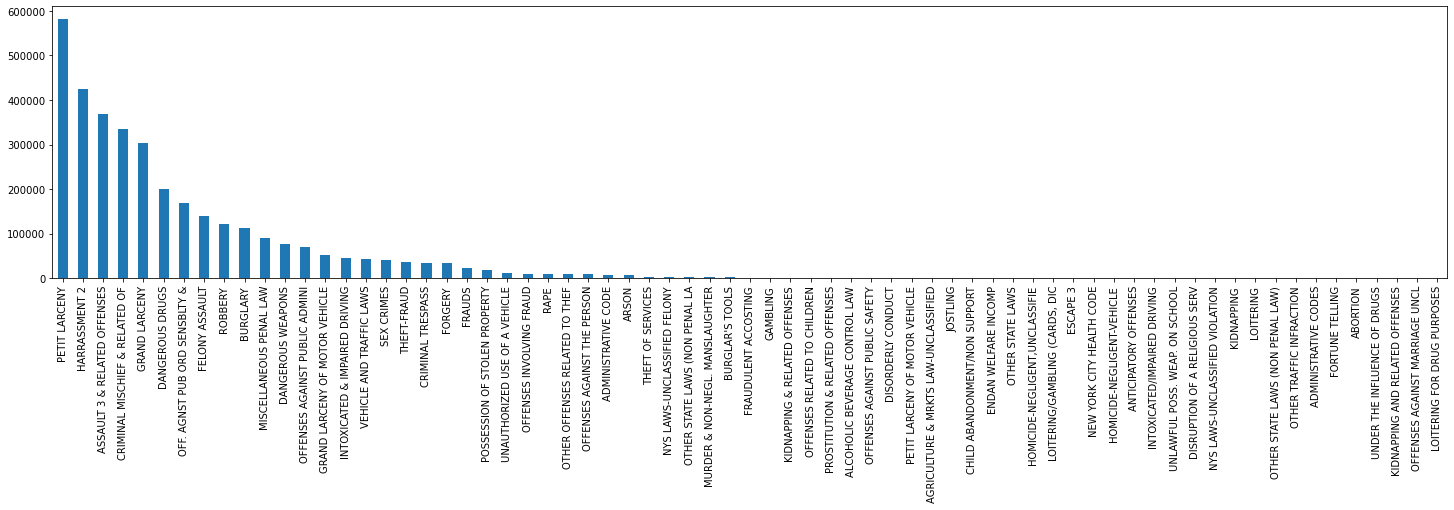

In [14]:
plt.figure(figsize=(25,5))
crime_df.ofns_desc.value_counts().plot(kind="bar");

### Inferences
- Petit Larceny is highest type of crime in New York city, which falls under property related crimes.
- Most of the crimes in the NYC are related to the property and harrasment of a person.
- Lottery is a crime in very few states in the US which includes Alabama, Utah, Guam, Hawaii, Alaska, Nevada, and Utah. That's reason we don't see much of the lottery crime cases in the dataset.

### Here are definitions of top 5 crimes in NYC.
 

* Petit Larceny - The theft of property whose value is below a certain specified amount, making the theft a misdemeanor rather than a felony.

* Grand Larceny - The more serious form of larceny, as distinguished from petit larceny, based on the monetary value of the stolen item.

* Harrasment 2 - The act of regular and unwarranted actions of one individual or group on another individual or group which is at a serious level.

* Assualt 3 and related - Reckless infliction of fear of serious bodily injury, or recklessly causing a fear of injury through the use of a deadly weapon.

* Criminal mischief - The damage, defacement, destruction, or alternation of another person’s property with criminal intent.








## Which crimes are mostly failed?

In [15]:
!pip install plotly
pd.get_option("plotting.backend")

'matplotlib'

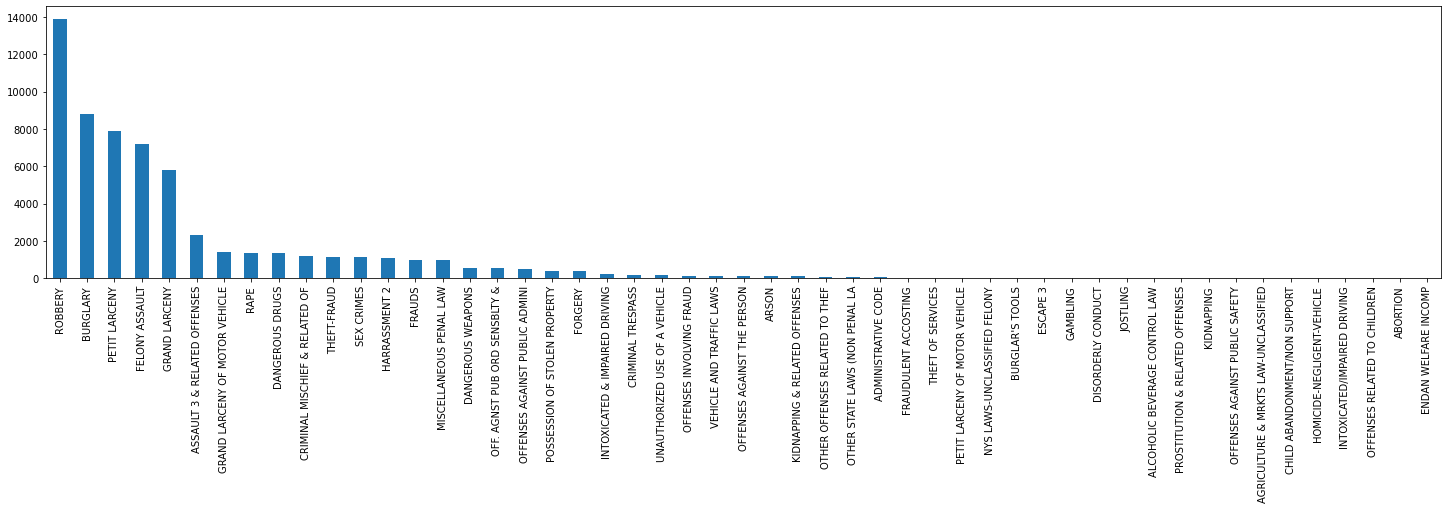

In [16]:
plt.figure(figsize=(25,5))
crime_df[crime_df.crm_atpt_cptd_cd == "ATTEMPTED"].ofns_desc.value_counts().plot(kind='bar');

**Inferences**
- Robbery and Burglary are the most failed crimes in NYC.
- 

## Which crimes are mostly completed?

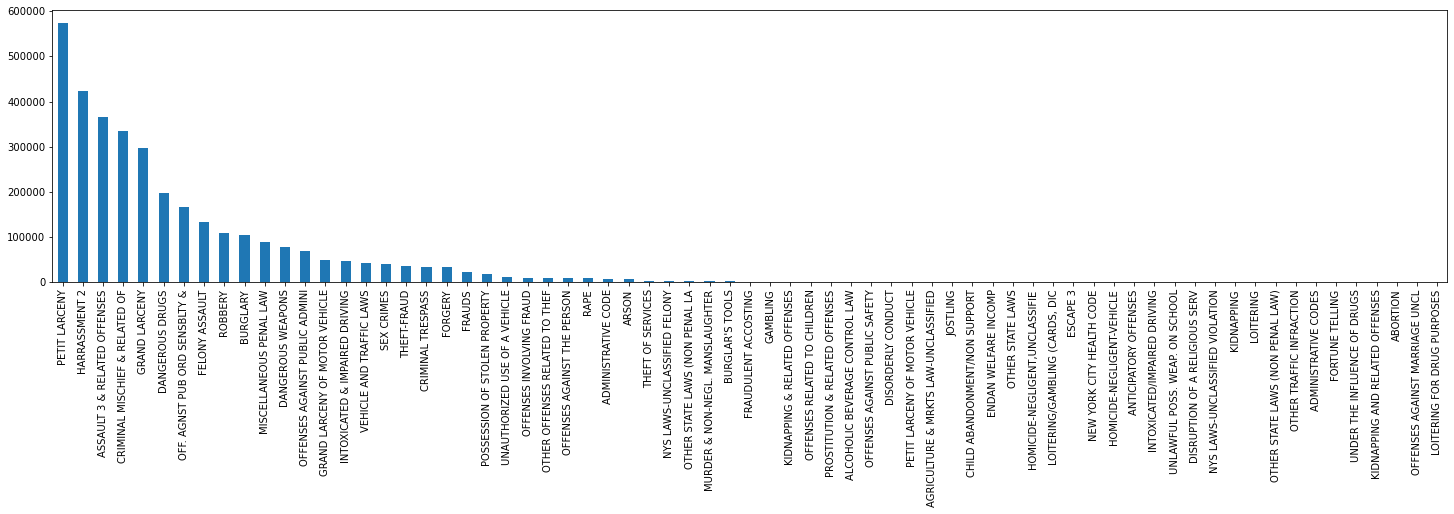

In [17]:
plt.figure(figsize=(25,5))
crime_df[crime_df.crm_atpt_cptd_cd == "COMPLETED"].ofns_desc.value_counts().plot(kind='bar');

### Observations
- Petiti Larceny crime is mostly successful compared to failed.
- Robbery, and Burglary crimes are often caught at the time of the event.
- Harrasment degree 2 crime is often completed than caught red handed.

<AxesSubplot:>

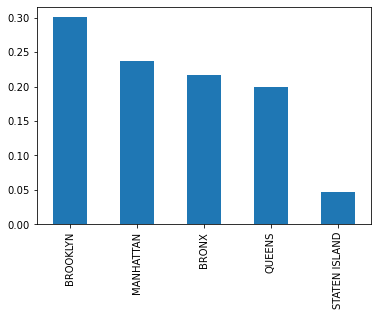

In [18]:
# Normalized boroughs according to crime data.
crime_df.boro_nm.value_counts(normalize=True).plot(kind='bar')

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


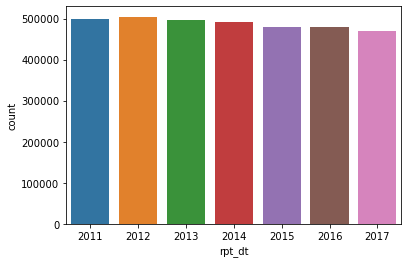

In [19]:
sns.countplot(crime_df.rpt_dt.dt.year);

<AxesSubplot:>

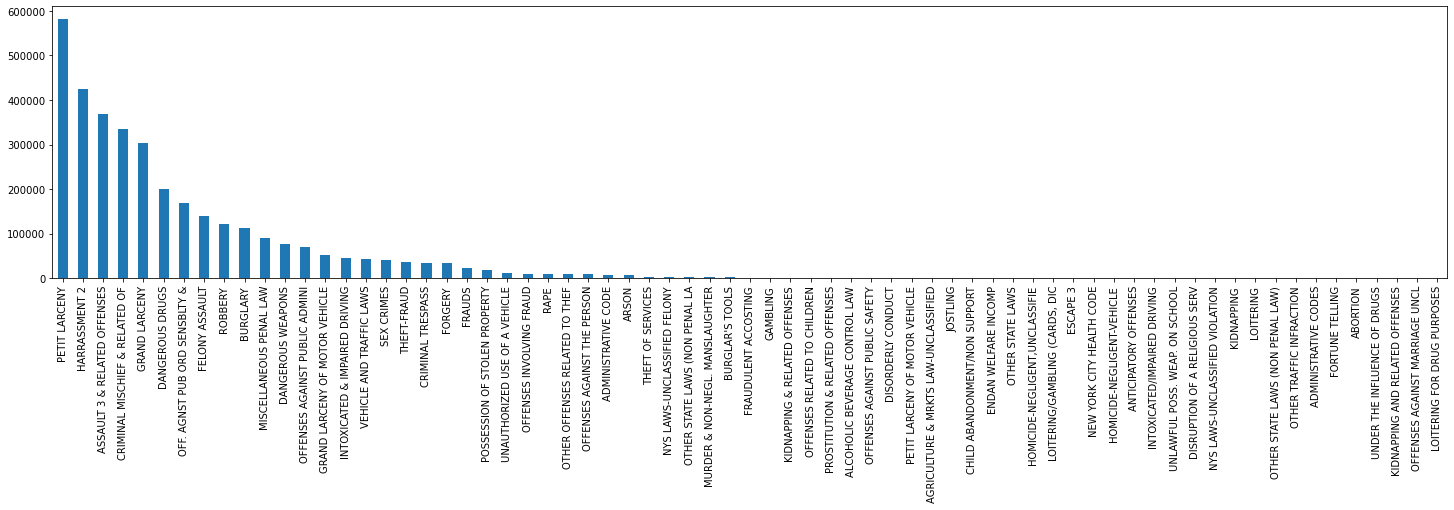

In [20]:
plt.figure(figsize=(25,5))
crime_df.ofns_desc.value_counts().plot(kind='bar')

### Inferences
- Petit Larceny is highest type of crime in New York city, which falls under property related crimes.
- Most of the crimes in the NYC are related to the property and harrasment of a person.
- Lottery is a crime in very few states in the US which includes Alabama, Utah, Guam, Hawaii, Alaska, Nevada, and Utah. That's reason we don't see much of the lottery crime cases in the dataset.

### Here are definitions of top 5 crimes in NYC.
 

* Petit Larceny - The theft of property whose value is below a certain specified amount, making the theft a misdemeanor rather than a felony.

* Grand Larceny - The more serious form of larceny, as distinguished from petit larceny, based on the monetary value of the stolen item.

* Harrasment 2 - The act of regular and unwarranted actions of one individual or group on another individual or group which is at a serious level.

* Assualt 3 and related - Reckless infliction of fear of serious bodily injury, or recklessly causing a fear of injury through the use of a deadly weapon.

* Criminal mischeif - The damage, defacement, destruction, or alternation of another person’s property with criminal intent.








## Which crimes are mostly failed?

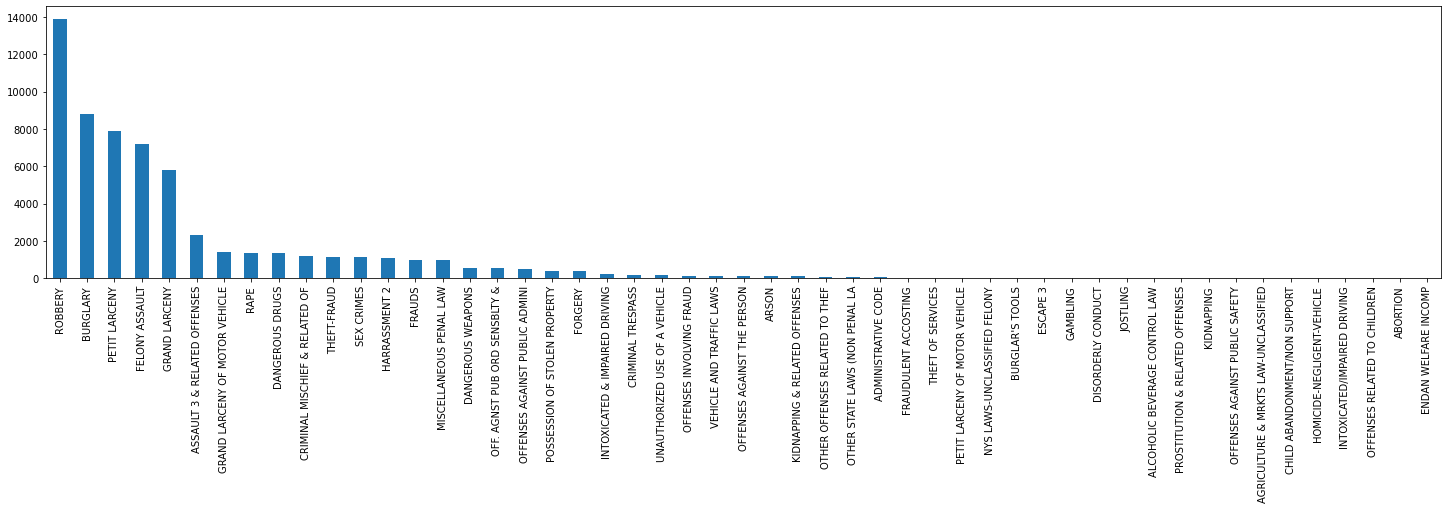

In [21]:
plt.figure(figsize=(25,5))
crime_df[crime_df.crm_atpt_cptd_cd == "ATTEMPTED"].ofns_desc.value_counts().plot(kind='bar');

## Which crimes are mostly completed?

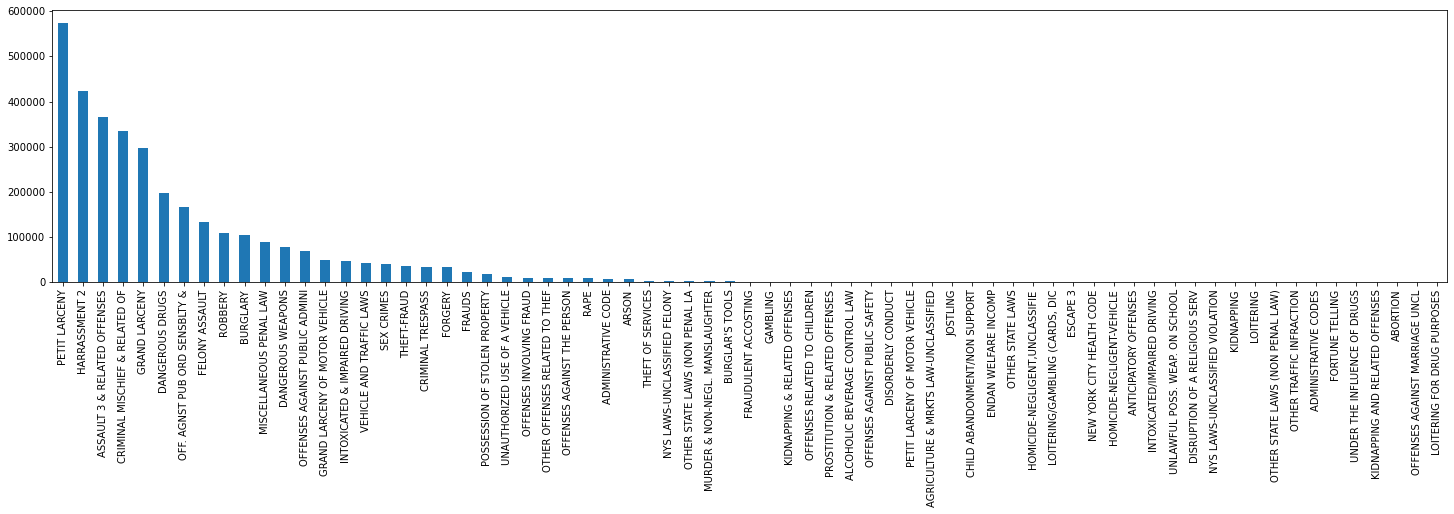

In [22]:
plt.figure(figsize=(25,5))
crime_df[crime_df.crm_atpt_cptd_cd == "COMPLETED"].ofns_desc.value_counts().plot(kind='bar');

### Observations
- Petiti Larceny crime is mostly successful compared to failed.
- Robbery, and Burglary crimes are often caught at the time of the event.
- Harrasment degree 2 crime is often completed than caught red handed.

<AxesSubplot:>

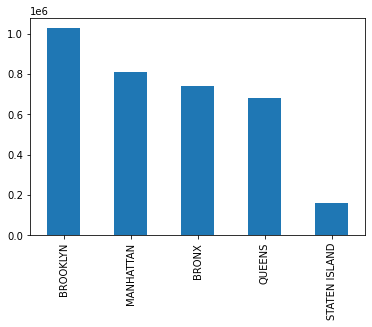

In [23]:
# Normalized boroughs according to crime data.

crime_df.boro_nm.value_counts().plot(kind='bar')

In [24]:
# Splitting the datasets into Boroughs
Brooklyn = crime_df[crime_df.boro_nm == "BROOKLYN"]
Manhattan = crime_df[crime_df.boro_nm == "MANHATTAN"]
Bronx = crime_df[crime_df.boro_nm == "BRONX"]
Queens = crime_df[crime_df.boro_nm == "QUEENS"]
Staten = crime_df[crime_df.boro_nm == "STATEN ISLAND"]

# Top 30 crimes in each boroughs

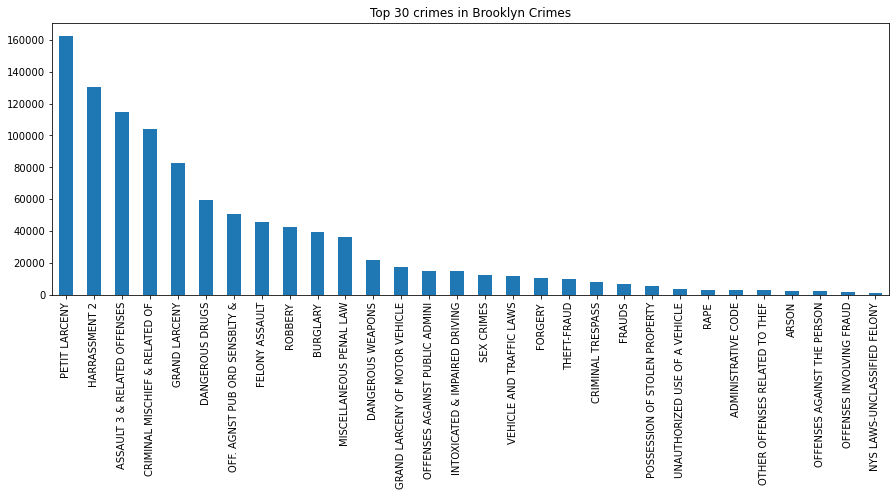

In [25]:
plt.figure(figsize=(15, 5))
plt.title("Top 30 crimes in Brooklyn Crimes")
Brooklyn.ofns_desc.value_counts()[:30].plot(kind='bar');

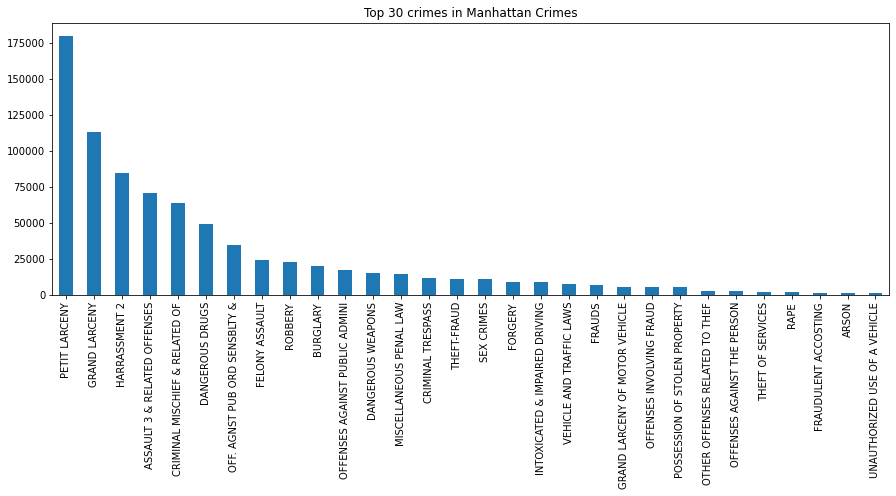

In [26]:
plt.figure(figsize=(15, 5))
plt.title("Top 30 crimes in Manhattan Crimes")
Manhattan.ofns_desc.value_counts()[:30].plot(kind='bar');

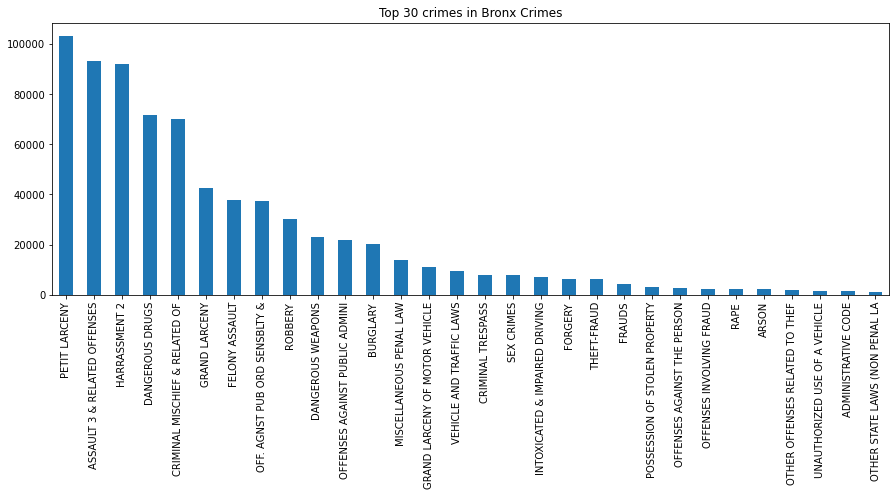

In [27]:
plt.figure(figsize=(15, 5))
plt.title("Top 30 crimes in Bronx Crimes")
Bronx.ofns_desc.value_counts()[:30].plot(kind='bar');

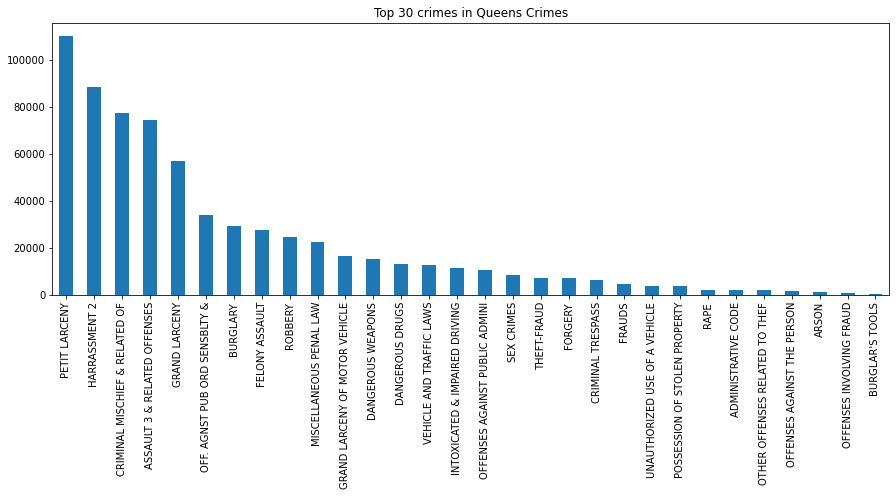

In [28]:
plt.figure(figsize=(15, 5))
plt.title("Top 30 crimes in Queens Crimes")
Queens.ofns_desc.value_counts()[:30].plot(kind='bar');

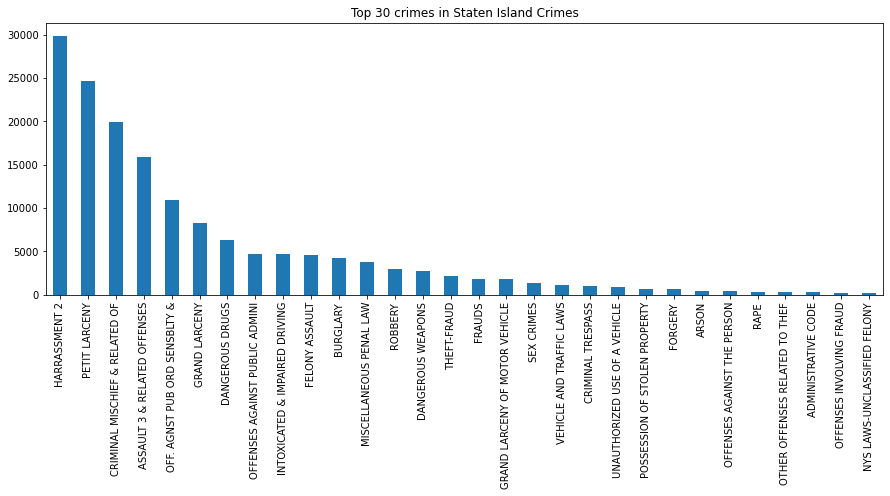

In [29]:
plt.figure(figsize=(15, 5))
plt.title("Top 30 crimes in Staten Island Crimes")
Staten.ofns_desc.value_counts()[:30].plot(kind='bar');

#### **Observations**


1.   2nd degree harrassment is the major crime in the Staten Island region compared to the other boroughs.
2.   




## EDA Income Data

We import the downloaded csv of this data https://data.cccnewyork.org/data/download#0,8/29 and view

In [30]:
Household_Income = pd.read_csv('https://raw.githubusercontent.com/ovadia21/AIM-5001/main/Household%20Income.csv', on_bad_lines='skip')
Household_Income

,Location,Income Level,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,"$100,000 to $199,999",2005,Number,8039.72359,101
1,Greenwich Village,"$100,000 to $199,999",2005,Number,11868.27641,102
2,Lower East Side,"$100,000 to $199,999",2005,Number,6951.00000,103
3,Chelsea/Clinton,"$100,000 to $199,999",2005,Number,10347.29257,104
4,Midtown Business District,"$100,000 to $199,999",2005,Number,5178.70743,105
...,...,...,...,...,...,...
15595,Brooklyn,"Under $15,000",2019,Percent,0.13490,36047
15596,Manhattan,"Under $15,000",2019,Percent,0.13616,36061
15597,Queens,"Under $15,000",2019,Percent,0.09335,36081
15598,Staten Island,"Under $15,000",2019,Percent,0.07199,36085


We attempt basic EDA of the data in the way that it is. We describe the value counts and try to plot the 'Data' column

In [31]:
Household_Income['Location'].value_counts().describe()

count     65.0
mean     240.0
std        0.0
min      240.0
25%      240.0
50%      240.0
75%      240.0
max      240.0
Name: Location, dtype: float64

In [32]:
Household_Income['Income Level'].value_counts().describe()

count       8.0
mean     1950.0
std         0.0
min      1950.0
25%      1950.0
50%      1950.0
75%      1950.0
max      1950.0
Name: Income Level, dtype: float64

In [33]:
Household_Income['TimeFrame'].value_counts().describe()

count      15.0
mean     1040.0
std         0.0
min      1040.0
25%      1040.0
50%      1040.0
75%      1040.0
max      1040.0
Name: TimeFrame, dtype: float64

In [34]:
Household_Income['Data'].describe()

count     15599.000000
mean       8922.883270
std       39080.182834
min           0.000000
25%           0.116995
50%           0.420870
75%        6305.000000
max      740780.000000
Name: Data, dtype: float64

<AxesSubplot:>

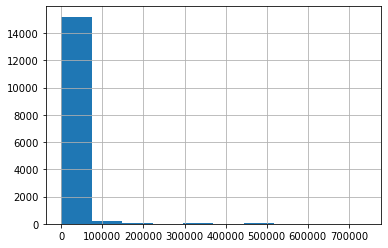

In [35]:
Household_Income['Data'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x239bf0f7040>,
 'caps': [<matplotlib.lines.Line2D at 0x239bf0f76a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239bf181d30>],
 'medians': [<matplotlib.lines.Line2D at 0x239bf0f7b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x239bf0f7e50>],
 'means': []}

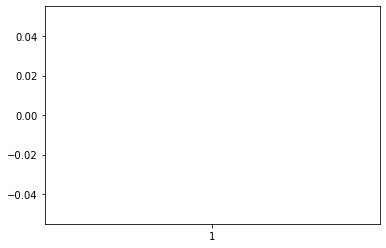

In [36]:
plt.boxplot(Household_Income['Data'])

In [37]:
Household_Income['DataFormat'].value_counts().describe()

count       2.0
mean     7800.0
std         0.0
min      7800.0
25%      7800.0
50%      7800.0
75%      7800.0
max      7800.0
Name: DataFormat, dtype: float64

We observe that EDA on the data in the way that it is is not very informative. The value counts are the same for most columns and the Data column is combining numbers and percentages which is skewing the data. We therefore prep the data in a way that will be more useful to us. 

## Data Preparation

First, we pivot the data from long to wide format, so that each income bracket is represented in its own column

In [38]:
Household_Income.pivot(index = ('Location', 'TimeFrame', 'DataFormat'), columns = 'Income Level', values = 'Data')

Income Level                    $100,000 to $199,999  $15,000 to $24,999  \
Location  TimeFrame DataFormat                                             
Astoria   2005      Number                9180.00000         10728.00000   
                    Percent                  0.11896             0.13901   
          2006      Number                9704.00000         10159.00000   
                    Percent                  0.12593             0.13183   
          2007      Number               10782.00000          7531.00000   
...                                              ...                 ...   
Woodhaven 2017      Percent                  0.23941             0.06520   
          2018      Number               11875.00000          3280.00000   
                    Percent                  0.27345             0.07553   
          2019      Number               11732.00000          2738.00000   
                    Percent                  0.27256             0.06361   

Income Level                    $200,000 or more  $25,000 to $34,999  \
Location  TimeFrame DataFormat                                         
Astoria   2005      Number             619.00000         11468.00000   
                    Percent              0.00802             0.14860   
          2006      Number             923.00000          9125.00000   
                    Percent              0.01198             0.11841   
          2007      Number            1496.00000          7616.00000   
...                                          ...                 ...   
Woodhaven 2017      Percent              0.05805             0.08171   
          2018      Number            2950.00000          3837.00000   
                    Percent              0.06793             0.08836   
          2019      Number            5135.00000          3263.00000   
                    Percent              0.11930             0.07581   

Income Level                    $35,000 to $49,999  $50,000 to $74,999  \
Location  TimeFrame DataFormat                                           
Astoria   2005      Number             10607.00000         12364.00000   
                    Percent                0.13745             0.16021   
          2006      Number             11689.00000         14456.00000   
                    Percent                0.15169             0.18759   
          2007      Number             10260.00000         13199.00000   
...                                            ...                 ...   
Woodhaven 2017      Percent                0.10425             0.19781   
          2018      Number              4078.00000          7357.00000   
                    Percent                0.09390             0.16941   
          2019      Number              4510.00000          8041.00000   
                    Percent                0.10478             0.18681   

Income Level                    $75,000 to $99,999  Under $15,000  
Location  TimeFrame DataFormat                                     
Astoria   2005      Number              8401.00000    13805.00000  
                    Percent                0.10886        0.17889  
          2006      Number              7882.00000    13122.00000  
                    Percent                0.10228        0.17028  
          2007      Number              8213.00000    12555.00000  
...                                            ...            ...  
Woodhaven 2017      Percent                0.16769        0.08587  
          2018      Number              6016.00000     4034.00000  
                    Percent                0.13853        0.09289  
          2019      Number              5251.00000     2373.00000  
                    Percent                0.12199        0.05513  

[1950 rows x 8 columns]

Now, we select the data that is relevant to the crime data that we are using. That is the year range 2011-2017 and the aggregated borough data. (Since our crime data is only in the range 2011-2017 and location is marked by the boroughs). We also divide the data into two separate dataframes one for the number of households and one for the percentage of households. 

In [39]:
df = Household_Income[Household_Income['TimeFrame'].isin([2011, 2012, 2013, 2014, 2015, 2016, 2017])]
df2 = df[df['Location'].isin(['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island'])]
numberdf = df2[df2['DataFormat'].isin(['Number'])]
percentdf = df2[df2['DataFormat'].isin(['Percent'])]
df2

,Location,Income Level,TimeFrame,DataFormat,Data,Fips
6299,Bronx,"$100,000 to $199,999",2011,Number,46176.00000,36005
6300,Brooklyn,"$100,000 to $199,999",2011,Number,130188.00000,36047
6301,Manhattan,"$100,000 to $199,999",2011,Number,146027.00000,36061
6302,Queens,"$100,000 to $199,999",2011,Number,145765.00000,36081
6303,Staten Island,"$100,000 to $199,999",2011,Number,41945.00000,36085
...,...,...,...,...,...,...
13514,Bronx,"Under $15,000",2017,Percent,0.23308,36005
13515,Brooklyn,"Under $15,000",2017,Percent,0.17134,36047
13516,Manhattan,"Under $15,000",2017,Percent,0.14413,36061
13517,Queens,"Under $15,000",2017,Percent,0.09658,36081


We pivot the number table and use the Location and Year as the index. We exclude the Fips column as it is not relevant to our research

In [40]:
numberpivot = numberdf.pivot(index = ('Location', 'TimeFrame'), columns = 'Income Level', values = 'Data')
numberpivot

Income Level             $100,000 to $199,999  $15,000 to $24,999  \
Location      TimeFrame                                             
Bronx         2011                    46176.0             72673.0   
              2012                    46253.0             68572.0   
              2013                    48295.0             66323.0   
              2014                    48608.0             71770.0   
              2015                    55293.0             68128.0   
              2016                    59299.0             65184.0   
              2017                    62086.0             67541.0   
Brooklyn      2011                   130188.0            111030.0   
              2012                   143936.0            108208.0   
              2013                   154457.0            100034.0   
              2014                   157693.0            108270.0   
              2015                   175167.0            101480.0   
              2016                   189255.0             94827.0   
              2017                   196811.0             88384.0   
Manhattan     2011                   146027.0             65234.0   
              2012                   150031.0             63814.0   
              2013                   158270.0             63474.0   
              2014                   167759.0             58675.0   
              2015                   163401.0             59675.0   
              2016                   162031.0             53854.0   
              2017                   177253.0             57276.0   
Queens        2011                   145765.0             85076.0   
              2012                   153018.0             86869.0   
              2013                   160271.0             79861.0   
              2014                   163849.0             81767.0   
              2015                   169437.0             73549.0   
              2016                   173201.0             67177.0   
              2017                   185152.0             67625.0   
Staten Island 2011                    41945.0             13015.0   
              2012                    44705.0             12257.0   
              2013                    45348.0             14818.0   
              2014                    43569.0             14161.0   
              2015                    47436.0             12584.0   
              2016                    48164.0             11426.0   
              2017                    49453.0             11423.0   

Income Level             $200,000 or more  $25,000 to $34,999  \
Location      TimeFrame                                         
Bronx         2011                 5525.0             52527.0   
              2012                 6887.0             54035.0   
              2013                 7959.0             56834.0   
              2014                 8477.0             52165.0   
              2015                 9738.0             53951.0   
              2016                 9872.0             54056.0   
              2017                11721.0             53017.0   
Brooklyn      2011                34283.0             91925.0   
              2012                39332.0             87343.0   
              2013                49591.0             91703.0   
              2014                53472.0             85491.0   
              2015                61328.0             90030.0   
              2016                70434.0             80969.0   
              2017                84867.0             76433.0   
Manhattan     2011               120765.0             53228.0   
              2012               122527.0             50237.0   
              2013               130655.0             48287.0   
              2014               139322.0             48381.0   
              2015               145323.0             47244.0   
              2016               151608.0             51799.0   
              20

We relable the columns based on the higher value of the bracket and put in ascending order. 

In [41]:
col = numberpivot.columns.values
numberpivot = numberpivot.rename(columns={col[0]: 200000, col[1] : 25000, col[2] : 300000, col[3] : 35000, col[4] : 50000, col[5] : 75000, col[6] : 100000, col[7]: 15000})
numberpivot = numberpivot[[15000, 25000, 35000, 50000, 75000, 100000, 200000, 300000]]
numberpivot

Income Level               15000     25000    35000     50000     75000   \
Location      TimeFrame                                                    
Bronx         2011       122376.0   72673.0  52527.0   60410.0   68097.0   
              2012       127178.0   68572.0  54035.0   64530.0   66623.0   
              2013       123899.0   66323.0  56834.0   62081.0   72942.0   
              2014       126816.0   71770.0  52165.0   68077.0   74277.0   
              2015       124760.0   68128.0  53951.0   65388.0   76982.0   
              2016       115661.0   65184.0  54056.0   67840.0   80960.0   
              2017       117470.0   67541.0  53017.0   65518.0   79812.0   
Brooklyn      2011       181759.0  111030.0  91925.0  113696.0  145611.0   
              2012       177714.0  108208.0  87343.0  116060.0  153370.0   
              2013       171274.0  100034.0  91703.0  112562.0  150225.0   
              2014       171152.0  108270.0  85491.0  118042.0  144922.0   
              2015       161586.0  101480.0  90030.0  105797.0  145607.0   
              2016       156239.0   94827.0  80969.0  103595.0  139870.0   
              2017       163841.0   88384.0  76433.0  105702.0  134416.0   
Manhattan     2011       114504.0   65234.0  53228.0   65841.0   94712.0   
              2012       117721.0   63814.0  50237.0   64108.0  105684.0   
              2013       109598.0   63474.0  48287.0   61634.0   86401.0   
              2014       115840.0   58675.0  48381.0   61721.0   92138.0   
              2015       108406.0   59675.0  47244.0   60190.0   97594.0   
              2016       108262.0   53854.0  51799.0   54840.0   93012.0   
              2017       110149.0   57276.0  43784.0   51323.0   88978.0   
Queens        2011        99596.0   85076.0  74556.0   98062.0  138195.0   
              2012        95339.0   86869.0  74529.0   99533.0  144381.0   
              2013        93576.0   79861.0  72342.0  103848.0  136045.0   
              2014        95745.0   81767.0  67054.0   97569.0  145797.0   
              2015        82354.0   73549.0  70773.0   97807.0  141571.0   
              2016        85301.0   67177.0  70020.0   92255.0  128469.0   
              2017        74298.0   67625.0  63605.0   92088.0  136544.0   
Staten Island 2011        16222.0   13015.0  12498.0   16311.0   27840.0   
              2012        19211.0   12257.0  10973.0   16205.0   27656.0   
              2013        17735.0   14818.0  12024.0   16109.0   28714.0   
              2014        20886.0   14161.0  12372.0   15187.0   23594.0   
              2015        22232.0   12584.0  10192.0   16422.0   25968.0   
              2016        20266.0   11426.0  11186.0   14125.0   22630.0   
              2017        20577.0   11423.0  10072.0   14665.0   23250.0   

Income Level               100000    200000    300000  
Location      TimeFrame                                
Bronx         2011        39354.0   46176.0    5525.0  
              2012        41900.0   46253.0    6887.0  
              2013        42810.0   48295.0    7959.0  
              2014        42291.0   48608.0    8477.0  
              2015        41273.0   55293.0    9738.0  
              2016        45667.0   59299.0    9872.0  
              2017        46820.0   62086.0   11721.0  
Brooklyn      2011        92570.0  130188.0   34283.0  
              2012        93370.0  143936.0   39332.0  
              2013        95643.0  154457.0   49591.0  
              2014       103360.0  157693.0   53472.0  
              2015        99181.0  175167.0   61328.0  
              2016       106682.0  189255.0   70434.0  
              2017       105769.0  196811.0   84867.0  
Manhattan     2011        68209.0  146027.0  120765.0  
              2012        72564.0  150031.0  122527.0  
              2013        68038.0  158270.0  130655.0  
              2014        78392.0  167759.0  139322.0  
              2015        69411.0  163401.0  145323.0  
           

We add a sum column which represents the total number of households. This will be useful in gauging the volume of crime in proprtion to the number of households. 

In [42]:
numberpivot['Num of Households'] = numberpivot.sum(axis = 1)
numberpivot

Income Level                15000     25000    35000     50000     75000  \
Location      TimeFrame                                                    
Bronx         2011       122376.0   72673.0  52527.0   60410.0   68097.0   
              2012       127178.0   68572.0  54035.0   64530.0   66623.0   
              2013       123899.0   66323.0  56834.0   62081.0   72942.0   
              2014       126816.0   71770.0  52165.0   68077.0   74277.0   
              2015       124760.0   68128.0  53951.0   65388.0   76982.0   
              2016       115661.0   65184.0  54056.0   67840.0   80960.0   
              2017       117470.0   67541.0  53017.0   65518.0   79812.0   
Brooklyn      2011       181759.0  111030.0  91925.0  113696.0  145611.0   
              2012       177714.0  108208.0  87343.0  116060.0  153370.0   
              2013       171274.0  100034.0  91703.0  112562.0  150225.0   
              2014       171152.0  108270.0  85491.0  118042.0  144922.0   
              2015       161586.0  101480.0  90030.0  105797.0  145607.0   
              2016       156239.0   94827.0  80969.0  103595.0  139870.0   
              2017       163841.0   88384.0  76433.0  105702.0  134416.0   
Manhattan     2011       114504.0   65234.0  53228.0   65841.0   94712.0   
              2012       117721.0   63814.0  50237.0   64108.0  105684.0   
              2013       109598.0   63474.0  48287.0   61634.0   86401.0   
              2014       115840.0   58675.0  48381.0   61721.0   92138.0   
              2015       108406.0   59675.0  47244.0   60190.0   97594.0   
              2016       108262.0   53854.0  51799.0   54840.0   93012.0   
              2017       110149.0   57276.0  43784.0   51323.0   88978.0   
Queens        2011        99596.0   85076.0  74556.0   98062.0  138195.0   
              2012        95339.0   86869.0  74529.0   99533.0  144381.0   
              2013        93576.0   79861.0  72342.0  103848.0  136045.0   
              2014        95745.0   81767.0  67054.0   97569.0  145797.0   
              2015        82354.0   73549.0  70773.0   97807.0  141571.0   
              2016        85301.0   67177.0  70020.0   92255.0  128469.0   
              2017        74298.0   67625.0  63605.0   92088.0  136544.0   
Staten Island 2011        16222.0   13015.0  12498.0   16311.0   27840.0   
              2012        19211.0   12257.0  10973.0   16205.0   27656.0   
              2013        17735.0   14818.0  12024.0   16109.0   28714.0   
              2014        20886.0   14161.0  12372.0   15187.0   23594.0   
              2015        22232.0   12584.0  10192.0   16422.0   25968.0   
              2016        20266.0   11426.0  11186.0   14125.0   22630.0   
              2017        20577.0   11423.0  10072.0   14665.0   23250.0   

Income Level               100000    200000    300000  Num of Households  
Location      TimeFrame                                                   
Bronx         2011        39354.0   46176.0    5525.0           467138.0  
              2012        41900.0   46253.0    6887.0           475978.0  
              2013        42810.0   48295.0    7959.0           481143.0  
              2014        42291.0   48608.0    8477.0           492481.0  
              2015        41273.0   55293.0    9738.0           495513.0  
              2016        45667.0   59299.0    9872.0           498539.0  
              2017        46820.0   62086.0   11721.0           503985.0  
Brooklyn      2011        92570.0  130188.0   34283.0           901062.0  
              2012        93370.0  143936.0   39332.0           919333.0  
              2013        95643.0  154457.0   49591.0           925489.0  
              2014       103360.0  157693.0   53472.0           942402.0  
              2015        99181.0  175167.0   61328.0           940176.0  
              2016       106682.0  189255.0   70434.0           941871.0  
              2017       105769.0  196811.0   84867.0         

Similarly, we pivot the percent table and index by Location and year. 

In [43]:
percentpivot = percentdf.pivot(index = ('Location', 'TimeFrame'), columns = 'Income Level', values = 'Data')
percentpivot

Income Level             $100,000 to $199,999  $15,000 to $24,999  \
Location      TimeFrame                                             
Bronx         2011                    0.09885             0.15557   
              2012                    0.09717             0.14407   
              2013                    0.10038             0.13784   
              2014                    0.09870             0.14573   
              2015                    0.11159             0.13749   
              2016                    0.11890             0.13080   
              2017                    0.12319             0.13401   
Brooklyn      2011                    0.14448             0.12322   
              2012                    0.15657             0.11770   
              2013                    0.16689             0.10809   
              2014                    0.16733             0.11489   
              2015                    0.18631             0.10794   
              2016                    0.20090             0.10070   
              2017                    0.20582             0.09243   
Manhattan     2011                    0.20044             0.08954   
              2012                    0.20093             0.08546   
              2013                    0.21790             0.08739   
              2014                    0.22009             0.07698   
              2015                    0.21751             0.07943   
              2016                    0.21650             0.07200   
              2017                    0.23194             0.07495   
Queens        2011                    0.19059             0.11124   
              2012                    0.19609             0.11132   
              2013                    0.20436             0.10183   
              2014                    0.20846             0.10403   
              2015                    0.21870             0.09493   
              2016                    0.22740             0.08820   
              2017                    0.24069             0.08791   
Staten Island 2011                    0.25926             0.08045   
              2012                    0.27348             0.07498   
              2013                    0.27053             0.08840   
              2014                    0.26410             0.08584   
              2015                    0.28326             0.07515   
              2016                    0.29320             0.06950   
              2017                    0.29793             0.06882   

Income Level             $200,000 or more  $25,000 to $34,999  \
Location      TimeFrame                                         
Bronx         2011                0.01183             0.11244   
              2012                0.01447             0.11352   
              2013                0.01654             0.11812   
              2014                0.01721             0.10592   
              2015                0.01965             0.10888   
              2016                0.01980             0.10840   
              2017                0.02326             0.10520   
Brooklyn      2011                0.03805             0.10202   
              2012                0.04278             0.09501   
              2013                0.05358             0.09909   
              2014                0.05674             0.09072   
              2015                0.06523             0.09576   
              2016                0.07480             0.08600   
              2017                0.08875             0.07993   
Manhattan     2011                0.16577             0.07306   
              2012                0.16409             0.06728   
              2013                0.17988             0.06648   
              2014                0.18278             0.06347   
              2015                0.19344             0.06289   
              2016                0.20260             0.06920   
              20

Again, we relabel and order the columns

In [44]:
col1 = percentpivot.columns.values
percentpivot1 = percentpivot.rename(columns={col1[0]: 200000, col1[1] : 25000, col1[2] : 300000, col1[3] : 35000, col1[4] : 50000, col1[5] : 75000, col1[6] : 100000, col1[7]: 15000})
percentpivot2 = percentpivot1[[15000, 25000, 35000, 50000, 75000, 100000, 200000, 300000]]
# percentpivot2.plot(kind='bar', figsize=(25, 5))
percentpivot2

Income Level              15000    25000    35000    50000    75000    100000  \
Location      TimeFrame                                                         
Bronx         2011       0.26197  0.15557  0.11244  0.12932  0.14577  0.08424   
              2012       0.26719  0.14407  0.11352  0.13557  0.13997  0.08803   
              2013       0.25751  0.13784  0.11812  0.12903  0.15160  0.08898   
              2014       0.25750  0.14573  0.10592  0.13823  0.15082  0.08587   
              2015       0.25178  0.13749  0.10888  0.13196  0.15536  0.08329   
              2016       0.23200  0.13080  0.10840  0.13610  0.16240  0.09160   
              2017       0.23308  0.13401  0.10520  0.13000  0.15836  0.09290   
Brooklyn      2011       0.20172  0.12322  0.10202  0.12618  0.16160  0.10273   
              2012       0.19331  0.11770  0.09501  0.12624  0.16683  0.10156   
              2013       0.18506  0.10809  0.09909  0.12162  0.16232  0.10334   
              2014       0.18161  0.11489  0.09072  0.12526  0.15378  0.10968   
              2015       0.17187  0.10794  0.09576  0.11253  0.15487  0.10549   
              2016       0.16590  0.10070  0.08600  0.11000  0.14850  0.11330   
              2017       0.17134  0.09243  0.07993  0.11054  0.14057  0.11061   
Manhattan     2011       0.15717  0.08954  0.07306  0.09038  0.13001  0.09363   
              2012       0.15766  0.08546  0.06728  0.08586  0.14154  0.09718   
              2013       0.15089  0.08739  0.06648  0.08485  0.11895  0.09367   
              2014       0.15198  0.07698  0.06347  0.08097  0.12088  0.10285   
              2015       0.14430  0.07943  0.06289  0.08012  0.12991  0.09239   
              2016       0.14470  0.07200  0.06920  0.07330  0.12430  0.09740   
              2017       0.14413  0.07495  0.05729  0.06716  0.11643  0.09373   
Queens        2011       0.13022  0.11124  0.09748  0.12821  0.18069  0.12380   
              2012       0.12217  0.11132  0.09551  0.12755  0.18502  0.12709   
              2013       0.11932  0.10183  0.09224  0.13242  0.17347  0.13245   
              2014       0.12182  0.10403  0.08531  0.12414  0.18550  0.12779   
              2015       0.10630  0.09493  0.09135  0.12624  0.18273  0.12756   
              2016       0.11200  0.08820  0.09190  0.12110  0.16860  0.13330   
              2017       0.09658  0.08791  0.08268  0.11971  0.17750  0.13204   
Staten Island 2011       0.10027  0.08045  0.07725  0.10082  0.17208  0.14571   
              2012       0.11752  0.07498  0.06713  0.09913  0.16918  0.14983   
              2013       0.10580  0.08840  0.07173  0.09610  0.17129  0.12042   
              2014       0.12660  0.08584  0.07499  0.09206  0.14302  0.14215   
              2015       0.13276  0.07515  0.06086  0.09806  0.15507  0.12297   
              2016       0.12340  0.06950  0.06810  0.08600  0.13770  0.12910   
              2017       0.12397  0.06882  0.06068  0.08835  0.14007  0.11322   

Income Level              200000   300000  
Location      TimeFrame                    
Bronx         2011       0.09885  0.01183  
              2012       0.09717  0.01447  
              2013       0.10038  0.01654  
              2014       0.09870  0.01721  
              2015       0.11159  0.01965  
              2016       0.11890  0.01980  
              2017       0.12319  0.02326  
Brooklyn      2011       0.14448  0.03805  
              2012       0.15657  0.04278  
              2013       0.16689  0.05358  
              2014       0.16733  0.05674  
              2015       0.18631  0.06523  
              2016       0.20090  0.07480  
              2017       0.20582  0.08875  
Manhattan     2011       0.20044  0.16577  
              2012       0.20093  0.16409  
              2013       0.21790  0.17988  
              2014       0.22009  0.18278  
              2015       0.21751  0.19344  
              2016       0.21650  0.20260  
              2017       0.23194  

We add a cumulative sum column. Each value represents the percentage of households that make less than the value in the column header. This will help serve as a model for income in the neighborhood. For example, we can compare a borough/year that has 65% of population making less than 50,000 vs a borough/year that only 34 percent of the population makes less than 50,000 per year

<Figure size 360x1800 with 0 Axes>

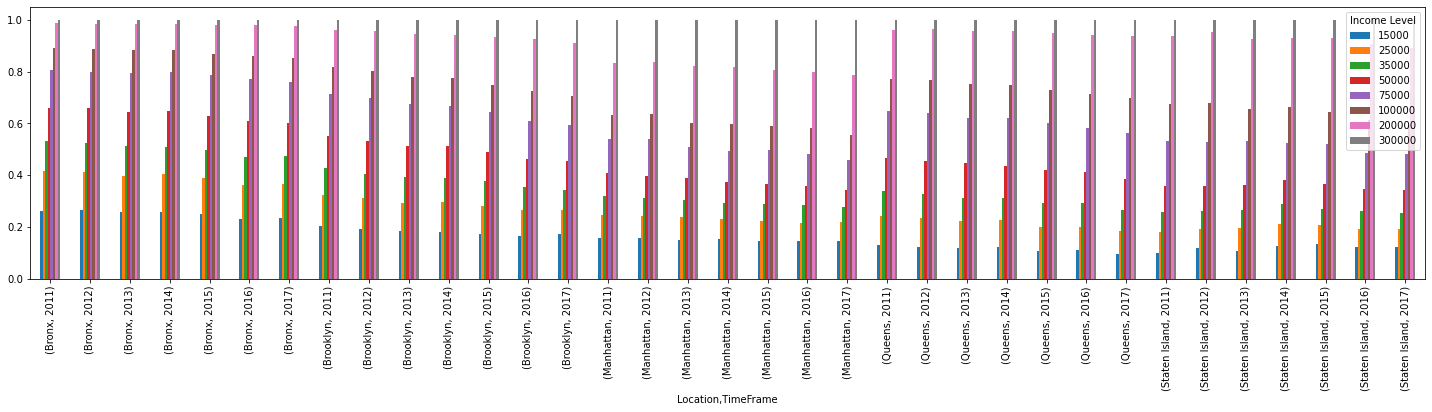

In [45]:
cumsum = percentpivot2.cumsum(axis = 1)
plt.figure(figsize=(5, 25))
cumsum.plot(kind='bar', figsize=(25, 5))
plt.show()

In [46]:
income = cumsum.iloc[:, 3].values.tolist()
cumsum

Income Level              15000    25000    35000    50000    75000    100000  \
Location      TimeFrame                                                         
Bronx         2011       0.26197  0.41754  0.52998  0.65930  0.80507  0.88931   
              2012       0.26719  0.41126  0.52478  0.66035  0.80032  0.88835   
              2013       0.25751  0.39535  0.51347  0.64250  0.79410  0.88308   
              2014       0.25750  0.40323  0.50915  0.64738  0.79820  0.88407   
              2015       0.25178  0.38927  0.49815  0.63011  0.78547  0.86876   
              2016       0.23200  0.36280  0.47120  0.60730  0.76970  0.86130   
              2017       0.23308  0.36709  0.47229  0.60229  0.76065  0.85355   
Brooklyn      2011       0.20172  0.32494  0.42696  0.55314  0.71474  0.81747   
              2012       0.19331  0.31101  0.40602  0.53226  0.69909  0.80065   
              2013       0.18506  0.29315  0.39224  0.51386  0.67618  0.77952   
              2014       0.18161  0.29650  0.38722  0.51248  0.66626  0.77594   
              2015       0.17187  0.27981  0.37557  0.48810  0.64297  0.74846   
              2016       0.16590  0.26660  0.35260  0.46260  0.61110  0.72440   
              2017       0.17134  0.26377  0.34370  0.45424  0.59481  0.70542   
Manhattan     2011       0.15717  0.24671  0.31977  0.41015  0.54016  0.63379   
              2012       0.15766  0.24312  0.31040  0.39626  0.53780  0.63498   
              2013       0.15089  0.23828  0.30476  0.38961  0.50856  0.60223   
              2014       0.15198  0.22896  0.29243  0.37340  0.49428  0.59713   
              2015       0.14430  0.22373  0.28662  0.36674  0.49665  0.58904   
              2016       0.14470  0.21670  0.28590  0.35920  0.48350  0.58090   
              2017       0.14413  0.21908  0.27637  0.34353  0.45996  0.55369   
Queens        2011       0.13022  0.24146  0.33894  0.46715  0.64784  0.77164   
              2012       0.12217  0.23349  0.32900  0.45655  0.64157  0.76866   
              2013       0.11932  0.22115  0.31339  0.44581  0.61928  0.75173   
              2014       0.12182  0.22585  0.31116  0.43530  0.62080  0.74859   
              2015       0.10630  0.20123  0.29258  0.41882  0.60155  0.72911   
              2016       0.11200  0.20020  0.29210  0.41320  0.58180  0.71510   
              2017       0.09658  0.18449  0.26717  0.38688  0.56438  0.69642   
Staten Island 2011       0.10027  0.18072  0.25797  0.35879  0.53087  0.67658   
              2012       0.11752  0.19250  0.25963  0.35876  0.52794  0.67777   
              2013       0.10580  0.19420  0.26593  0.36203  0.53332  0.65374   
              2014       0.12660  0.21244  0.28743  0.37949  0.52251  0.66466   
              2015       0.13276  0.20791  0.26877  0.36683  0.52190  0.64487   
              2016       0.12340  0.19290  0.26100  0.34700  0.48470  0.61380   
              2017       0.12397  0.19279  0.25347  0.34182  0.48189  0.59511   

Income Level              200000   300000  
Location      TimeFrame                    
Bronx         2011       0.98816  0.99999  
              2012       0.98552  0.99999  
              2013       0.98346  1.00000  
              2014       0.98277  0.99998  
              2015       0.98035  1.00000  
              2016       0.98020  1.00000  
              2017       0.97674  1.00000  
Brooklyn      2011       0.96195  1.00000  
              2012       0.95722  1.00000  
              2013       0.94641  0.99999  
              2014       0.94327  1.00001  
              2015       0.93477  1.00000  
              2016       0.92530  1.00010  
              2017       0.91124  0.99999  
Manhattan     2011       0.83423  1.00000  
              2012       0.83591  1.00000  
              2013       0.82013  1.00001  
              2014       0.81722  1.00000  
              2015       0.80655  0.99999  
              2016       0.79740  1.00000  
              2017       0.78563  

In [47]:
crime_df['Year'] = crime_df.rpt_dt.dt.year
crime = pd.DataFrame(crime_df.groupby(["boro_nm", "Year"]).size())

crime.rename({0:"NCrimes"}, axis=1, inplace=True)
crime.index.rename({"boro_nm":"Borough"}, inplace=True)
crime.reset_index(inplace=True)
crime.Borough = crime.Borough.str.capitalize()

income = pd.DataFrame(cumsum.iloc[:, 3])
income.index.rename({"Location": "Borough", "TimeFrame":"Year"}, inplace = True)

In [48]:
final_df = pd.concat([income.reset_index(), crime.NCrimes, numberpivot["Num of Households"].reset_index()], axis=1).drop("Location", axis=1)
final_df["Crime/HH"] = final_df['NCrimes']/final_df["Num of Households"]
# final_df["Perc pop with income <50000"] = (final_df[50000]*final_df["Num of Households"])/final_df["Num of Households"]
final_df.head()

,Borough,Year,50000,NCrimes,TimeFrame,Num of Households,Crime/HH
0,Bronx,2011,0.65930,108657,2011,467138.0,0.232602
1,Bronx,2012,0.66035,106790,2012,475978.0,0.224359
2,Bronx,2013,0.64250,104421,2013,481143.0,0.217027
3,Bronx,2014,0.64738,105861,2014,492481.0,0.214954
4,Bronx,2015,0.63011,104912,2015,495513.0,0.211724


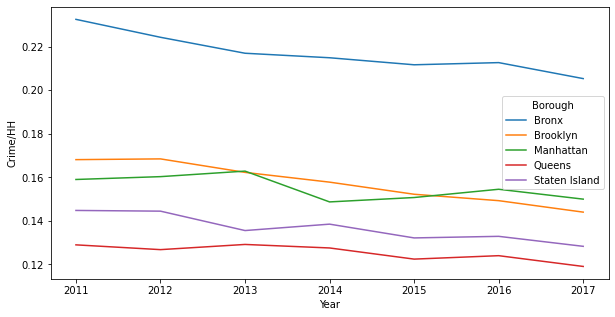

In [49]:
fig = pd.pivot_table(final_df.reset_index(),
               index='Year', columns='Borough', values='Crime/HH'
              ).plot(figsize=(10, 5), ylabel = "Crime/HH")

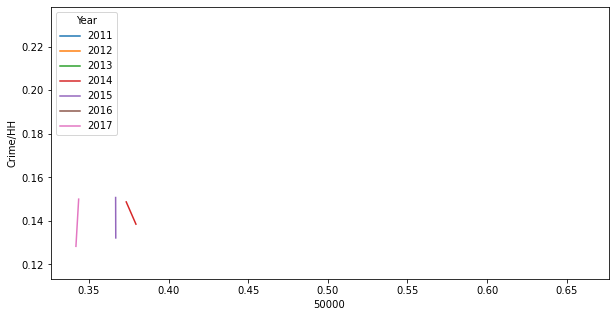

In [55]:
fig = pd.pivot_table(final_df.reset_index(),
               index=50000, columns='Year', values='Crime/HH'
              ).plot(figsize=(10, 5), ylabel = "Crime/HH")

<AxesSubplot:>

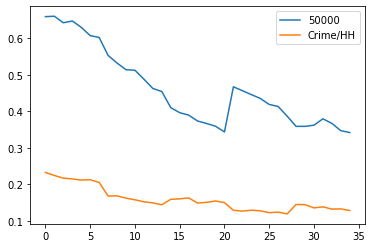

In [51]:
final_df[[50000, "Crime/HH"]].plot()

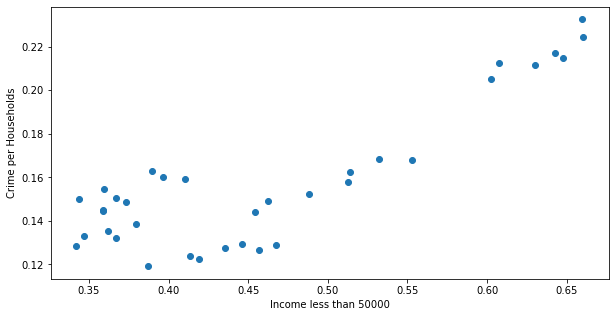

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(final_df[50000], final_df['Crime/HH'])
plt.xlabel("Income less than 50000")
plt.ylabel('Crime per Households')
plt.show()

In [82]:
import numpy as np 
from numpy import linalg as la
A=[]
for i in final_df[50000]:
    a=[1,i]
    A.append(a)
b=np.mat(final_df['Crime/HH'])
A=np.mat(A)
FA=np.matmul(A.T,A)
Fb=np.matmul(A.T,b.T)
x=np.linalg.solve(FA,Fb)
rmse=np.matmul(A,x)-b
print(x)
print(la.norm(rmse))

[[0.03494636]
 [0.26750643]]
1.4876872295504728


In [85]:
A=[]
for i in final_df[50000]:
    a=[1,i**2]
    A.append(a)
b=np.mat(final_df['Crime/HH'])
A=np.mat(A)
FA=np.matmul(A.T,A)
Fb=np.matmul(A.T,b.T)
x=np.linalg.solve(FA,Fb)
rmse=np.matmul(A,x)-b
print(x)
print(la.norm(rmse))

[[0.0964536]
 [0.2769805]]
1.5089212122497035


Given the RMSE of two functions, we prefer to use f=0.03494636+0.26750643*x to fit the relationship between crime and income.

## Prepped Data Review

## Investigative Analysis

## Conclusions

Eventually, we can draw some conclusions safely.
First of all, for the economy of New York, it is obviously that people are richer and richer. The proportion of household who earn 100,000 dollar to more than 
200,000 doubled in 2011 to 2017. However, the proportion of household who earn under 50,000 is still about 40 percent.
Secondly, for the crime in New York, Petit Larceny is the highest type of crime in New York city, which falls under property related crimes. Besides, it is also 
mostly successful compared to failed. Brooklyn and Manhattan is the most dangerous district and Staten Island is the safest district. The crime decrease slightly with 
years going, which is a bad news.
Finally, taken what we have discussed, the crime has a strong relative to the proportion of people whose family earn under 50,000 dollar, which means there is a 
strong relative between poverty and crime. The more poor area is, the more dangerous area is.From my perspective, the reason of this phenomenon are as follows. 
First of all, most of poor family can not afford tuition of a university, which means they seldom get a high paid job, and that will be a vicious cycle. 
The more poor people are, the less of possibility to get a good job, and people will be more and more poor.  What's more, drug and guns abusement are also 
a big problem, which make some children of poor family have to stray to commit a crime. However, what we talked above is just a inference without experiment 
and if someone want to go deeper, it will need others effort, but which is not our purpose.
